In [ ]:
!pip install tensorflow
!pip install wordcloud
!pip install nltk
!pip install keras
!pip install keras.models

##Load Libraries

In [4]:
# DL
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder as one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
# ML
from sklearn.preprocessing import LabelEncoder
import pickle
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##Load Data

In [9]:
## lets start
import pandas as pd
import numpy as np

In [81]:
tdata = pd.read_csv("/content/drive/MyDrive/train.txt")

In [82]:
tdata.columns=["text"]

In [83]:
tdata[['text', 'emotion']] = tdata['text'].str.split(';', expand=True)

In [84]:
tdata


,text,emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


In [85]:
tdata['length']=[len(x) for x in tdata['text']]

In [86]:
tdata.isnull().sum()

,0
text,0
emotion,0
length,0


In [ ]:
tdata.duplicated().sum()

np.int64(1)

In [14]:
tdata.drop_duplicates(inplace=True)

##EDA

In [ ]:
tdata['emotion'].value_counts()

,count
emotion,
joy,5361
sadness,4665
anger,2159
fear,1937
love,1304
surprise,572


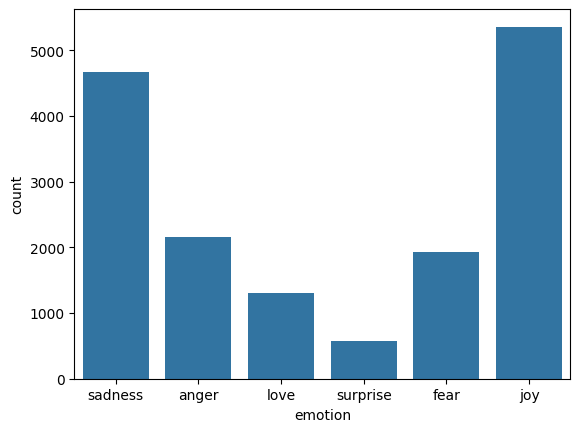

In [ ]:
sns.countplot(x=tdata['emotion'])
plt.show()

In [ ]:
tdata2=tdata.copy()
length = tdata2['length'].values

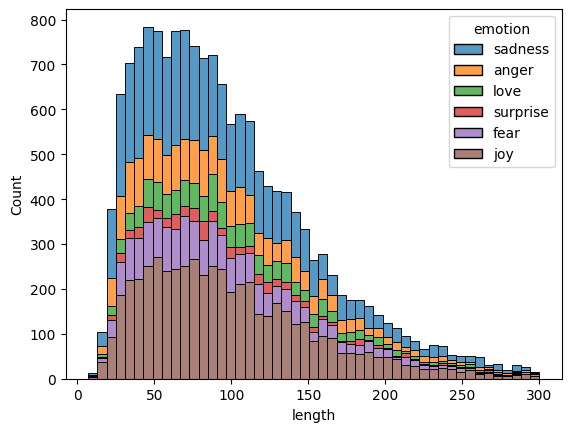

In [ ]:
sns.histplot(tdata,x='length',hue='emotion',multiple='stack')
plt.show()

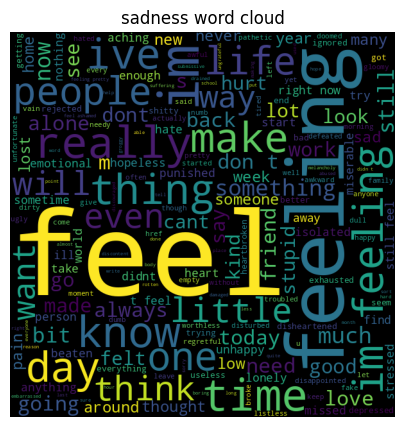

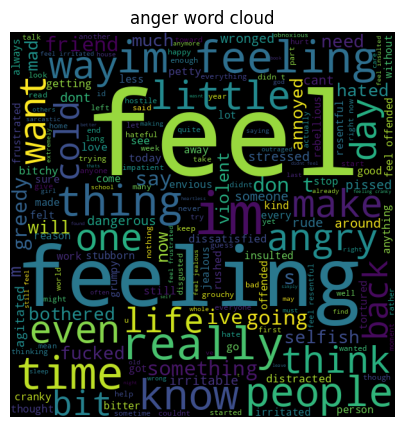

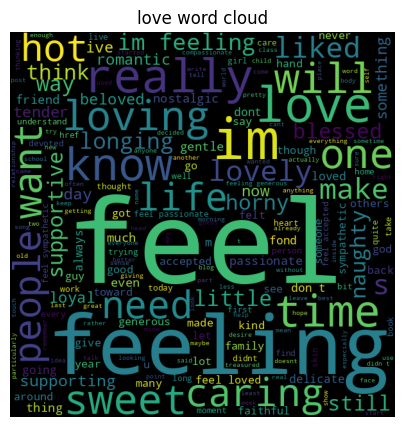

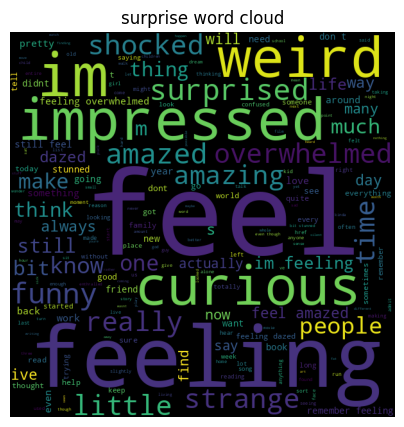

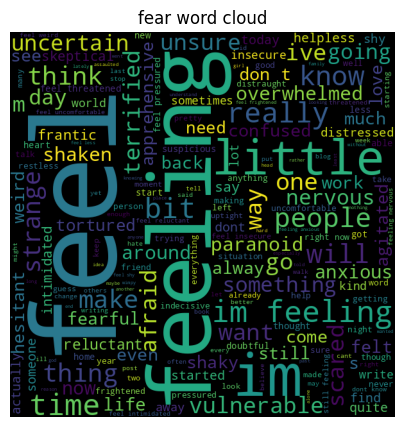

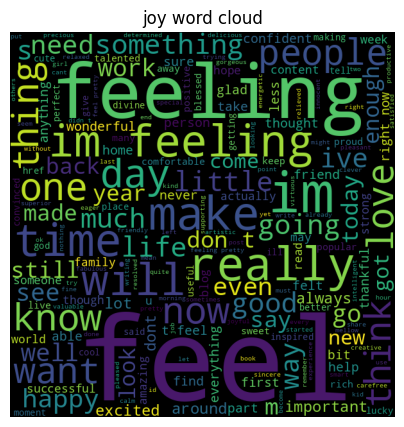

In [ ]:
def words_cloud(wordcloud, emotion):
  plt.figure(figsize=(5,5))
  plt.title(emotion + " word cloud")
  plt.imshow(wordcloud)
  plt.axis('off')


emotions = tdata['emotion'].unique()
for emo in emotions:
  df = tdata[tdata['emotion']==emo]
  words = ' '.join(df['text'])
  wc= WordCloud(width = 600 , height = 600 ) . generate(words) # removes stopwords
  W=words_cloud(wc,emo)

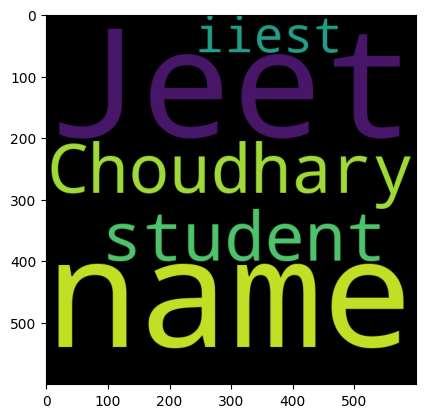

In [ ]:
text='my name is Jeet Choudhary and i am student of iiest'
wc= WordCloud(width = 600 , height = 600 ) . generate(text) # removes stopwords
plt.imshow(wc)

# Data Preprocessing

## 1> encode emotions

In [90]:
lb = LabelEncoder()
tdata2=tdata.copy()

In [91]:
tdata2['emotion_encode']=lb.fit_transform(tdata['emotion'])

In [92]:
tdata2['emotion_encode'].unique()

array([4, 0, 3, 5, 1, 2])

In [93]:
tdata['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

## 2> Apply ML

###using TFIDF vectorizer

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
tdata2=tdata.copy()

In [ ]:
tdata2

,text,emotion,length,emotion_encode
0,i can go from feeling so hopeless to so damned...,sadness,108,4
1,im grabbing a minute to post i feel greedy wrong,anger,48,0
2,i am ever feeling nostalgic about the fireplac...,love,92,3
3,i am feeling grouchy,anger,20,0
4,ive been feeling a little burdened lately wasn...,sadness,65,4
...,...,...,...,...
15994,i just had a very brief time in the beanbag an...,sadness,101,4
15995,i am now turning and i feel pathetic that i am...,sadness,102,4
15996,i feel strong and good overall,joy,30,2
15997,i feel like this was such a rude comment and i...,anger,59,0


### Stopwords removal

In [ ]:
import nltk
nltk.download('stopwords')
len(nltk.corpus.stopwords.words('english')) ## NO of stopwrods in english
stopwords=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [ ]:
def stopwords_removal_and_Stemming(text):
  stemmer = PorterStemmer
  text = re.sub('[^a-zA-Z]', ' ', text) ## to rmeove all symbols
  text=text.lower() #lower casing
  text = text.split() #for stopwords removal
  text = [word for word in text if word not in stopwords] #best
  text=[ps.stem(word) for word in text] #stemming
  text = ' '.join(text)
  return text


In [ ]:
tdata3=tdata.copy()

In [ ]:
tdata3['text'] = tdata3['text'].apply(stopwords_removal_and_Stemming)

In [ ]:
tdata3.sample(4)

,text,emotion,length,emotion_encode
9754,yell feel extrem mad,anger,52,0
14949,usual feel aggrav unprofession attitud rest cast,anger,87,0
5836,feel bit confid here gorgeou pair cream amp le...,joy,140,2
1752,id alway proud im come sometim feel im dorki b...,sadness,173,4


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(tdata3['text'],tdata['emotion'],test_size=0.2,random_state=42)

In [ ]:
X_train

,text
8762,reason wonder confus feel anger say your selfi...
10149,feel belov countri think true capabl govern area
5120,want write secret life live one hand peopl kno...
10368,feel bit overwhelm
921,still feel littl daze high alarm sinc hour
...,...
13418,feel like bit strang one
5390,feel glad
860,admit feel bit intimid challeng
15796,ill tri figur calori see much take make feel s...


###TFIDF(Term Frequency Inverse Document Frequency) Vectorizer - importance of word in a sentence

IDF - log of the total sentences/doc div by num of sentences/doc that contain the word


TFIDF = TF * IDF

In [ ]:
tfidf_vec = TfidfVectorizer(max_features=3000)
tfidf_X_train = tfidf_vec.fit_transform(X_train)
tfidf_X_test = tfidf_vec.transform(X_test)

In [ ]:
classifier = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC()
}


In [ ]:
for name, clf in classifier.items():
  print(f"\n===================== {name} ===================")
  clf.fit(tfidf_X_train,y_train)
  y_pred = clf.predict(tfidf_X_test)
  print("\n Accuracy Score : "+str(accuracy_score(y_test,y_pred)))
  print("\n Classification Report : \n"+classification_report(y_test,y_pred))


===================== MultinomialNB ===================

 Accuracy Score : 0.7265625

 Classification Report : 
              precision    recall  f1-score   support

       anger       0.87      0.50      0.63       429
        fear       0.83      0.45      0.59       397
         joy       0.67      0.96      0.79      1080
        love       0.96      0.19      0.32       276
     sadness       0.74      0.92      0.82       919
    surprise       1.00      0.02      0.04        99

    accuracy                           0.73      3200
   macro avg       0.85      0.51      0.53      3200
weighted avg       0.77      0.73      0.69      3200


===================== LogisticRegression ===================

 Accuracy Score : 0.8365625

 Classification Report : 
              precision    recall  f1-score   support

       anger       0.85      0.75      0.80       429
        fear       0.83      0.76      0.79       397
         joy       0.81      0.94      0.87      1080
        l

In [ ]:
# lets go with logistic regression
lg = LogisticRegression()
lg.fit(tfidf_X_train,y_train)
y_pred = lg.predict(tfidf_X_test)

In [ ]:
def predict_emotion(input_text):
  cleaned_text = stopwords_removal_and_Stemming(input_text)
  clean_vectorized = tfidf_vec.transform([cleaned_text])

  prediction = lg.predict(clean_vectorized)[0] #returns list so [0]
  # pred_emotion = lb.inverse_transform([prediction])[0]
  # label = np.max(lg.predict(clean_vectorized))[0]
  return prediction

print("predicted emotion: "+ predict_emotion('i feel like i have been beaten up'))

predicted emotion: sadness


In [ ]:
#save files
import pickle
pickle.dump(lg,open('/content/drive/MyDrive/01_ML-projects/Emotion Classification System/lg.pkl','wb'))
pickle.dump(lb,open('/content/drive/MyDrive/01_ML-projects/Emotion Classification System/lb.pkl','wb'))
pickle.dump(tfidf_vec,open('/content/drive/MyDrive/01_ML-projects/Emotion Classification System/tfidf_vec.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


# APPLY DL using LSTM


## Text cleaning , Encoding , Padding

In [61]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [55]:
def clean_text(df,column,vocab_size,max_len):
  stemmer = PorterStemmer()

  corpus = []
  for text in df[column]:
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=text.split()
    text=[word for word in text if word not in stopwords]
    text=[stemmer.stem(word) for word in text]
    text=' '.join(text)
    corpus.append(text)
  one_hot_word = [one_hot(word,vocab_size) for word in corpus]
  word_pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
  return word_pad

X_train = clean_text(tdata,'text',vocab_size=11000,max_len=300)
# X_train = X_train.apply(clean_text(tdata,'text',vocab_size=11000,max_len=300))

In [56]:

lb=LabelEncoder()
tdata['emotion'] = lb.fit_transform(tdata['emotion'])

In [57]:
y_train = to_categorical(tdata['emotion'])

### Model Building

In [51]:
model = Sequential()
model.add(Embedding(input_dim=11000,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(units=128)) #initial layer
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid')) #hidden layer
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax')) #output layer

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=64, verbose=1)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 183s 713ms/step - accuracy: 0.3100 - loss: 1.6442
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 190s 760ms/step - accuracy: 0.6680 - loss: 0.9424
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 191s 714ms/step - accuracy: 0.8696 - loss: 0.4162
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 711ms/step - accuracy: 0.9153 - loss: 0.2692
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 177s 709ms/step - accuracy: 0.9419 - loss: 0.1864


### Predictive System

In [64]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [105]:
def pred(text):
  stemmer = PorterStemmer()
  corpus = []
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text=[word for word in text if word not in stopwords]
  text=[stemmer.stem(word) for word in text]
  text=' '.join(text)
  corpus.append(text)

  one_hot_word = [one_hot(word,11000) for word in corpus]
  word_pad = pad_sequences(sequences=one_hot_word,maxlen=300,padding='pre')
  return word_pad


sentences =[
    'i hate mango',
    'i feel strong and beautiful',
    'he is handsome and very strong'
]
for s in sentences:
  clean_sent_padded = pred(s)
  model_pred = np.max(model.predict(clean_sent_padded))*100
  emotion = lb.inverse_transform([np.argmax(model.predict(clean_sent_padded),axis=-1)])[0]
  print(emotion,' - ',model_pred,'%')
  print("-------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
anger  -  85.01152 %
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
joy  -  99.438896 %
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
joy  -  96.69407 %
-------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Save Model

In [106]:
model.save('/content/drive/MyDrive/01_ML-projects/Emotion Classification System/model.h5')